1) Delivery Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# reading a csv file using pandas library
Deti=pd.read_csv("delivery_time.csv")
Deti
pd.set_option('display.min_rows', None)

In [2]:
Deti.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
Deti.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
Deti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
Deti.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

#Plot

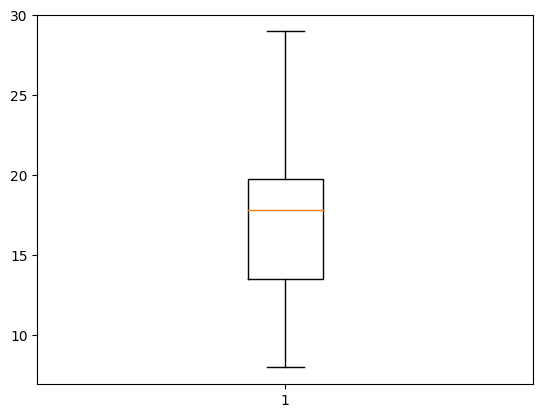

In [ ]:
plt.boxplot(Deti['Delivery Time'])
plt.show()

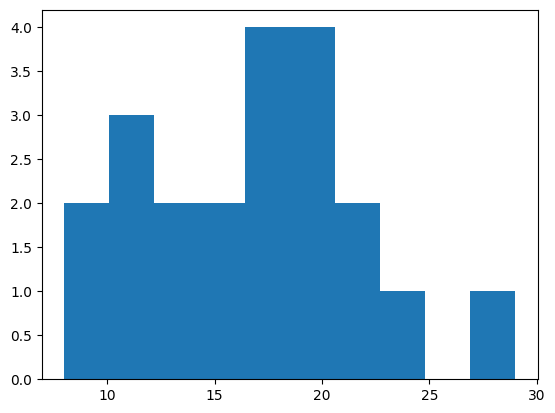

In [ ]:
plt.hist(Deti['Delivery Time'])
plt.show()

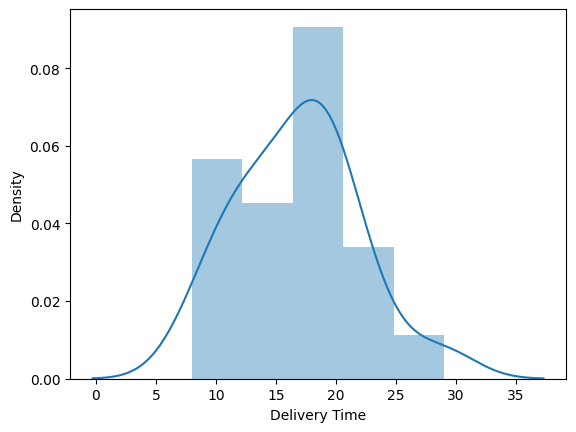

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(Deti['Delivery Time'])
plt.show()

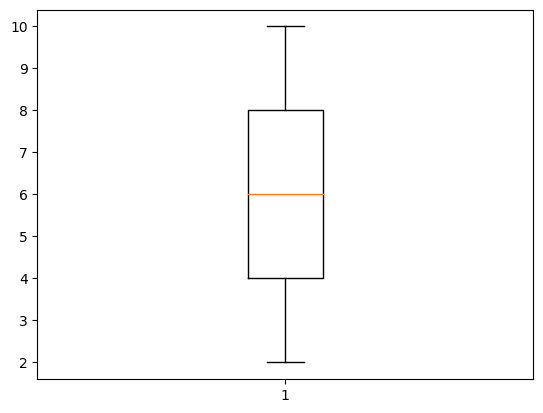

In [ ]:
plt.boxplot(Deti['Sorting Time'])
plt.show()

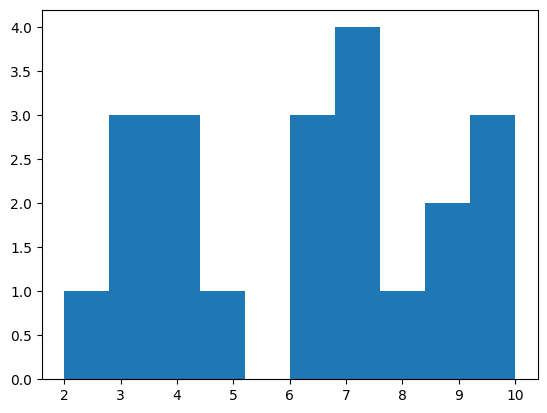

In [ ]:
plt.hist(Deti['Sorting Time'])
plt.show()

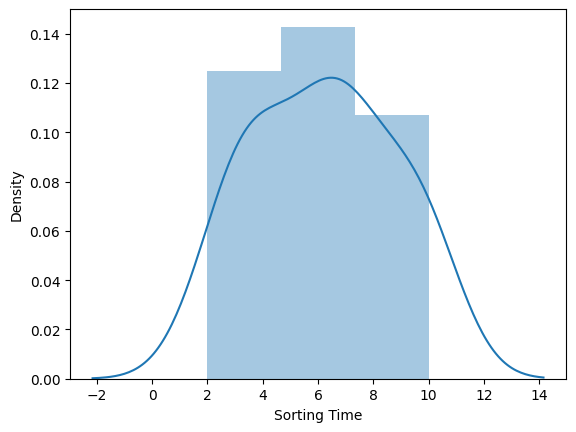

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.distplot(Deti['Sorting Time'])
plt.show()

Text(0.5, 1.0, 'ScatterPlot')

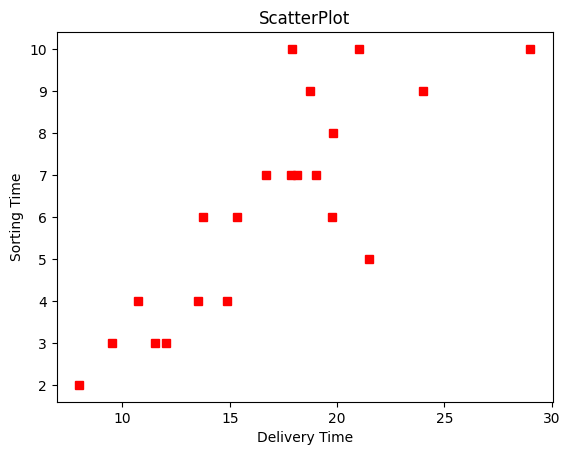

In [ ]:
plt.plot(Deti['Delivery Time'],Deti['Sorting Time'],"rs")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("ScatterPlot")
#help(plt.plot)

#Correlation

In [ ]:
Deti.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#Regression Models

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("Deti['Sorting Time']~Deti['Delivery Time']",data=Deti).fit()
model.params

Intercept               -0.756673
Deti['Delivery Time']    0.413744
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Deti['Sorting Time']   R-squared:                       0.682
Model:                              OLS   Adj. R-squared:                  0.666
Method:                   Least Squares   F-statistic:                     40.80
Date:                  Mon, 19 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                          15:48:23   Log-Likelihood:                -36.839
No. Observations:                    21   AIC:                             77.68
Df Residuals:                        19   BIC:                             79.77
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.7567      1.134     -0.667      0.513      -3.130       1.617
Deti['Delivery Time']     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred = model.predict(Deti['Delivery Time'])
#pred = model.predict(Deti.iloc[:,0])
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [ ]:
pred = model.predict(Deti['Delivery Time'])
pred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [ ]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [ ]:
model.resid_pearson

array([ 1.40674689, -0.56381619, -0.9623592 , -0.11779731, -0.8447675 ,
        0.27597371, -0.07105342, -0.1182853 ,  2.27920872,  1.35975901,
        0.37557826,  0.21014188,  0.58188575, -0.6811639 , -0.83032673,
       -0.95220243,  0.72627659,  0.17942755, -0.37635266,  0.25823056,
       -2.13510428])

In [ ]:
rmse_lin = np.sqrt(np.mean((np.array(Deti['Sorting Time'])-np.array(pred))**2))
rmse_lin

1.398343056795723

Text(0, 0.5, 'Sorting Time')

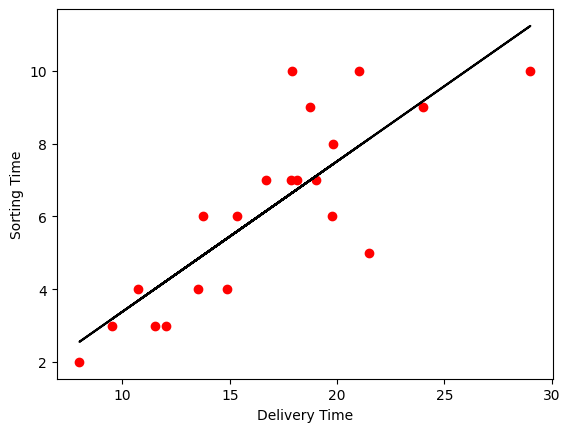

In [ ]:
#import matplotlib.pylab as plt
plt.scatter(x=Deti['Delivery Time'],y=Deti['Sorting Time'],color='red')
plt.plot(Deti['Delivery Time'],pred,color='black')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

In [ ]:
model2 = smf.ols("Deti['Sorting Time']~np.log(Deti['Delivery Time'])",data=Deti).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Deti['Sorting Time']   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 19 Feb 2024   Prob (F-statistic):           1.59e-06
Time:                          15:48:24   Log-Likelihood:                -35.846
No. Observations:                    21   AIC:                             75.69
Df Residuals:                        19   BIC:                             77.78
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Deti['Delivery Time'])     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2 = model2.predict(pd.DataFrame(Deti['Delivery Time']))
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [ ]:
pred2
rmse_log = np.sqrt(np.mean((np.array(Deti['Sorting Time'])-np.array(pred2))**2))
rmse_log

1.3337477286899515

In [ ]:
pred2.corr(Deti['Sorting Time'])

0.8431772637224149

Text(0, 0.5, 'Sorting Time')

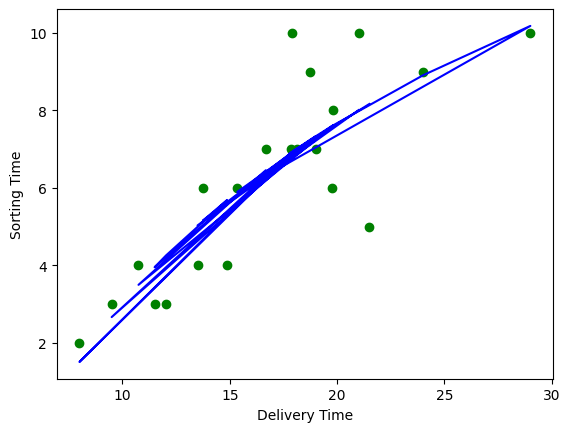

In [ ]:
plt.scatter(x=Deti['Delivery Time'],y=Deti['Sorting Time'],color='green')
plt.plot(Deti['Delivery Time'],pred2,color='blue')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

In [ ]:
#exponential model
model3 = smf.ols("np.log(Deti['Sorting Time'])~Deti['Delivery Time']",data=Deti).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(Deti['Sorting Time'])   R-squared:                       0.695
Model:                                      OLS   Adj. R-squared:                  0.679
Method:                           Least Squares   F-statistic:                     43.39
Date:                          Mon, 19 Feb 2024   Prob (F-statistic):           2.64e-06
Time:                                  15:48:24   Log-Likelihood:               -0.85600
No. Observations:                            21   AIC:                             5.712
Df Residuals:                                19   BIC:                             7.801
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4372      0.204      2.139      0.046       0.009       0.865
Deti['Delivery Time']     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred_log = model3.predict(pd.DataFrame(Deti['Delivery Time']))

In [ ]:
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [ ]:
pred3=np.exp(pred_log)  # as we have used log(Deti['Sorting Time']) in preparing model so we need to convert it back
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [ ]:
rmse_exp = np.sqrt(np.mean((np.array(Deti['Sorting Time'])-np.array(pred3))**2))
rmse_exp

1.79214500168698

In [ ]:
pred3.corr(Deti['Sorting Time'])

0.7472768828616799

Text(0, 0.5, 'Sorting Time')

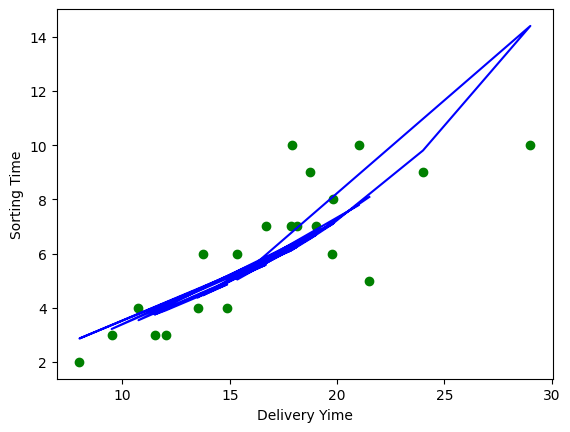

In [ ]:
plt.scatter(x=Deti['Delivery Time'],y=Deti['Sorting Time'],color='green')
plt.plot(Deti['Delivery Time'],pred3,color='blue')
plt.xlabel('Delivery Yime')
plt.ylabel('Sorting Time')

In [ ]:
time_resid = model3.resid_pearson
time_resid

array([ 0.94514898, -0.33626175, -0.61992804, -0.32314918, -1.3766316 ,
        0.65705128,  0.17950335, -0.26108323,  1.84483896,  1.20051932,
        0.44256592,  0.46185032,  0.85281972, -0.84152838, -0.99534634,
       -0.7367689 ,  1.12140739,  0.43780144, -1.35597416,  0.51906376,
       -1.81589886])

In [ ]:
Deti["Delivery Time_Sq"] = Deti['Delivery Time']*Deti['Delivery Time']
Deti

,Delivery Time,Sorting Time,Delivery Time_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [ ]:
model_quad = smf.ols("np.log(Deti['Sorting Time'])~Deti['Delivery Time']+Deti['Delivery Time_Sq']",data=Deti).fit()

In [ ]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log(Deti['Sorting Time'])   R-squared:                       0.794
Model:                                      OLS   Adj. R-squared:                  0.771
Method:                           Least Squares   F-statistic:                     34.62
Date:                          Mon, 19 Feb 2024   Prob (F-statistic):           6.77e-07
Time:                                  15:48:25   Log-Likelihood:                 3.2337
No. Observations:                            21   AIC:                           -0.4673
Df Residuals:                                18   BIC:                             2.666
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.7780      0.450     -1.730      0.101      -1.723       0.167
Deti['Delivery Time']        0.2272      0.052      4.346      0.000       0.117       0.337
Deti['Delivery Time_Sq']    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_quad = model_quad.predict(Deti)
pred4=np.exp(pred_quad)  # as we have used log(Sorting Time) in preparing model so we need to convert it back
pred4

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [ ]:
rmse_quad = np.sqrt(np.mean((np.array(Deti['Sorting Time'])-np.array(pred4))**2))
rmse_quad

1.34714198002557

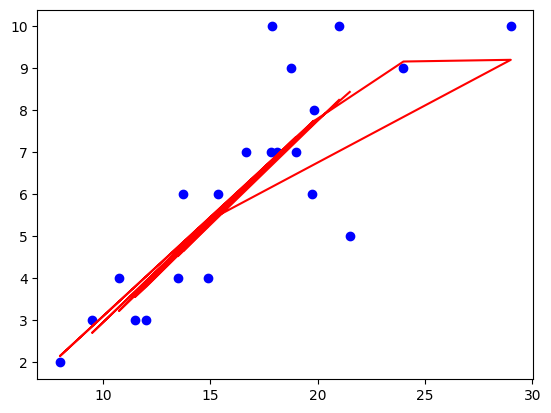

In [ ]:
plt.scatter(Deti['Delivery Time'],Deti['Sorting Time'],c="b")
plt.plot(Deti['Delivery Time'],pred4,"r")

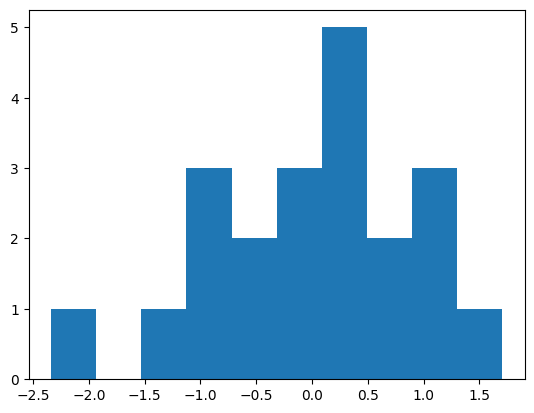

In [ ]:
plt.hist(model_quad.resid_pearson)
plt.show()

In [ ]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,1.398343,0.682271
1,rmse_log,1.333748,0.710948
2,rmse_exp,1.792145,0.695443
3,rmse_quad,1.347142,0.793693


#From above Table we can see by using Square root Transformation R-squared valued is 0.794 which is higher than other transformation and It is best model for better performance